In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Simple Tensor Fun

In [5]:
points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
points

tensor([4., 1., 5., 3., 2., 1.])

# Autograd

## Function

Define a function

In [57]:
def f(x):
    return(3*x**2)

We can call the function like any other function

In [71]:
f(points)

tensor([48.,  3., 75., 27., 12.,  3.])

Now we want to track the gradient => we need `requires_grad=True`

In [78]:
x = torch.tensor([2.0], requires_grad=True)

In [90]:
y = f(x)      # calc the value of y
y.backward()  # perform backpropagation (calculates the gadient)
(y, x.grad)   # output the function value and df/dx @ x = 2 df/dx = 6x = 12 (@ x = 2)

(tensor([12.], grad_fn=<MulBackward0>), tensor([24.]))

## Using a Linear (1,1) Model

The model is basically y = linear_model.weight x + linear_model.basis

In [117]:
linear_model = nn.Linear(1,1)
(linear_model.weight, linear_model.bias)

(Parameter containing:
 tensor([[-0.3062]], requires_grad=True),
 Parameter containing:
 tensor([-0.5751], requires_grad=True))

In [119]:
x = torch.tensor([2.0], requires_grad=True)

In [121]:
y = linear_model(x)     # calc the value of y
y.backward()            # perform backpropagation (calculates the gadient)
(y, x.grad)             # output the function value and df/dx = linear_model.weight

(tensor([-1.1875], grad_fn=<ViewBackward0>), tensor([-0.3062]))

Manually doing the model computation

In [124]:
x * linear_model.weight + linear_model.bias

tensor([[-1.1875]], grad_fn=<AddBackward0>)

## Using a Linear (2,1) Model

We have a model taking two inputs and producing one output,

y = linear_model.weight[0] x[0] + linear_model.weight[1] x[1] + linear_model.basis

In [139]:
linear_model = nn.Linear(2,1)
(linear_model.weight, linear_model.bias)

(Parameter containing:
 tensor([[-0.1421, -0.0388]], requires_grad=True),
 Parameter containing:
 tensor([0.6144], requires_grad=True))

In [151]:
x = torch.tensor([2.0, 3.0], requires_grad=True)

In [153]:
y = linear_model(x)     # calc the value of y
y.backward()            # perform backpropagation (calculates the gadient)
(y, x.grad)             # output the function value and df/dx = linear_model.weight

(tensor([0.2137], grad_fn=<ViewBackward0>), tensor([-0.1421, -0.0388]))

In [175]:
linear_model.weight[0][0] * x[0] + linear_model.weight[0][1] * x[1] + linear_model.bias

tensor([0.2137], grad_fn=<AddBackward0>)

# Activation Functions

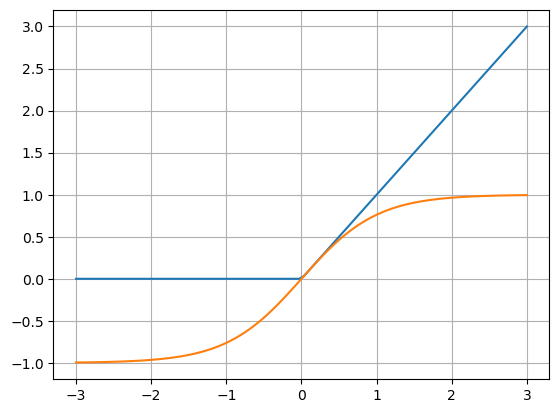

In [206]:
x_range = torch.linspace(-3., 3., steps = 100).unsqueeze(1)

relu = nn.ReLU()
yrelu = relu(x_range)
plt.plot(x_range, yrelu)

tnh = nn.Tanh()
ytnh = tnh(x_range)
plt.plot(x_range, ytnh)

plt.grid(True)

In [22]:
# softmax = rescaling, so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.
m = nn.Softmax(dim=1)
input = torch.tensor([[-1.0, 1.0, 2.0, 4.0]])
output = m(input)
output

tensor([[0.0057, 0.0418, 0.1135, 0.8390]])

# Loss Functions

In [5]:
x = torch.tensor([1.0, 3.0], requires_grad=True)
y = torch.tensor([2.0, 5.0], requires_grad=True)

In [9]:
loss = nn.MSELoss()
loss(x,y)

tensor(2.5000, grad_fn=<MseLossBackward0>)

In [8]:
# per default it uses mean -> \times 1/2
1/2*(1 + 2**2)

2.5

In [10]:
loss = nn.L1Loss()
loss(x,y)

tensor(1.5000, grad_fn=<MeanBackward0>)

In [11]:
# per default it uses mean -> \times 1/2
1/2*(1 + 2)

1.5